In [1]:
import gzip
import numpy as np
import pickle
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
f=gzip.open('/home/jesse/Code/neural-networks-and-deep-learning/data/mnist.pkl.gz')

In [3]:
training_data, validation_data, test_data = pickle.load(f,encoding='latin1')
f.close()

In [4]:
training_data[0].shape

(50000, 784)

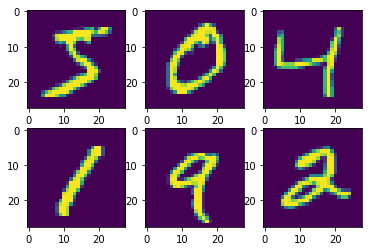

4


In [5]:
exampl = training_data[0][0].reshape(28,28)
plt.subplot(2,3,1)
plt.imshow(exampl)

exampl = training_data[0][1].reshape(28,28)
plt.subplot(2,3,2)
plt.imshow(exampl)

exampl = training_data[0][2].reshape(28,28)
plt.subplot(2,3,3)
plt.imshow(exampl)

exampl = training_data[0][3].reshape(28,28)
plt.subplot(2,3,4)
plt.imshow(exampl)

exampl = training_data[0][4].reshape(28,28)
plt.subplot(2,3,5)
plt.imshow(exampl)

exampl = training_data[0][5].reshape(28,28)
plt.subplot(2,3,6)
plt.imshow(exampl)

plt.show()
print(training_data[1][2])

In [6]:
f=gzip.open('/home/jesse/Code/neural-nets/MNIST_data/train-images-idx3-ubyte.gz')

In [7]:
import keras
from keras.models import Sequential

Using TensorFlow backend.


In [39]:
model = Sequential()

In [8]:
from keras.layers import Dense, Activation

In [16]:
model = Sequential([
    Dense(256, input_shape=(784,),activation='relu'),
    Dense(256,activation='relu'),
    Dense(10,activation='softmax',trainable=),
])

In [17]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_8 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_9 (Dense)              (None, 10)                2570      
Total params: 269,322
Trainable params: 266,752
Non-trainable params: 2,570
_________________________________________________________________


In [15]:
65792-256*256

256

In [54]:
model.compile(optimizer = 'Adam',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

In [50]:
# Convert labels to categorical one-hot encoding
one_hot_labels = keras.utils.to_categorical(training_data[1], num_classes=10)

In [55]:
# Train the model, iterating on the data in batches of 32 samples
model.fit(training_data[0],one_hot_labels,epochs=10,batch_size=64)

Epoch 1/10
50000/50000 [==============================] - 90s - loss: 0.2435 - acc: 0.9269        

In [56]:
y_test = keras.utils.to_categorical(test_data[1],num_classes=10)

In [57]:
score = model.evaluate(test_data[0],y_test)

 9536/10000 [===========================>..] - ETA: 0s 

In [58]:
print('Test loss: ',score[0])

Test loss:  0.139833982974


In [59]:
print('Test accuracy:',score[1])

Test accuracy: 0.9671


## Now split MNIST dataset

In [175]:
def make_subset(data: tuple,numbers: list):
    """
    Takes a list of numbers and returns the part of the MNIST dataset corresponding to these numbers. 
    """
    if isinstance(numbers,int):
        numbers = [numbers]
    idx = [np.squeeze(np.argwhere(data[1]==i)) for i in numbers]
    idx = np.sort(np.concatenate( idx, axis=0 ))
    return data[0][idx], data[1][idx]

In [210]:
model = Sequential([
    Dense(256, input_shape=(784,)),
    Activation('relu'),
    Dense(256),
    Activation('relu'),
    Dense(10),
    Activation('softmax')
])

In [226]:
task = 0
score_task1=[0,0]
score_task2=[0,0]
for i in range(0,4,2):
        
    train_x, train_y = make_subset(training_data,[i,i+1])

    one_hot_labels = keras.utils.to_categorical(train_y, num_classes=10)

    model.compile(optimizer = 'Adam',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])
    model.fit(train_x,one_hot_labels,epochs=10,batch_size=64)
    
    # first, test on task 1 
    test_x, test_y = make_subset(test_data,[0,1])
    test_y = keras.utils.to_categorical(test_y,num_classes=10)
    score_task1[task] = model.evaluate(test_x,test_y)
    
    # then, test on task 2
    test_x, test_y = make_subset(test_data,[2,3])
    test_y = keras.utils.to_categorical(test_y,num_classes=10)
    score_task2[task] = model.evaluate(test_x,test_y)

    task += 1

Epoch 1/10
10610/10610 [==============================] - 1s - loss: 0.0011 - acc: 0.9998          

In [227]:
score_task1

[[0.0076209683508598001, 0.99952718676122931],
 [11.456930575359516, 0.011820330969267139]]

In [228]:
score_task2

[[15.699201815508955, 0.0], [0.013092741012352358, 0.99461312479650588]]

In [240]:
test_x1, test_y1 = make_subset(test_data,[0,1])
test_x2, test_y2 = make_subset(test_data,[2,3])
test_y1 = keras.utils.to_categorical(test_y1,num_classes=10)
test_y2 = keras.utils.to_categorical(test_y2,num_classes=10)

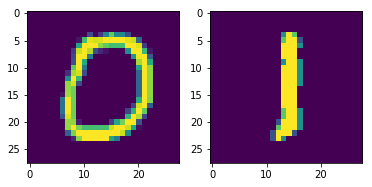

In [251]:
plt.subplot(1,2,1)
plt.imshow(test_x1[3].reshape((28,28)))
plt.subplot(1,2,2)
plt.imshow(test_x1[5].reshape((28,28)))
plt.show()